# Task 1: Exploratory Data Analysis (EDA)

Q1. Load the Mushroom dataset and perform fundamental data exploration.

Q2. Utilize histograms, box plots, or density plots to understand feature distributions.

Q3. Investigate feature correlations to discern relationships within the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

# Load the dataset into a DataFrame or equivalent data structure.
df= pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [2]:
# Get number of rows and columns

print("\nNumber of rows and columns:")
df.shape


Number of rows and columns:


(2000, 26)

In [3]:
# Get column names

print("\nColumn names:")
df.columns


Column names:


Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [4]:
# Get data types of columns

print("\nData types of columns:")
df.dtypes


Data types of columns:


Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [5]:
# Check for any missing values

print("\nMissing values:")
df.isnull().sum()


Missing values:


Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

Hence, we can conclude that there are no missing values.

In [6]:
# Removing duplicate rows

df.drop_duplicates(inplace=True)
df.shape

(976, 26)

Before dropping duplicates, there were 2000 rows in the dataset. However, after removing the duplicates, there are now 976 rows in the dataset.

In [7]:
# Drop first column which is irrelevant
df = df.drop(columns=['Unnamed: 0'])
df.shape

(976, 25)

In [8]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,tapering,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
1988,bell,grooves,pink,yes,anise,descending,distant,broad,brown,enlarging,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
1989,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,tapering,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


#### Visualizations to understand feature distributions

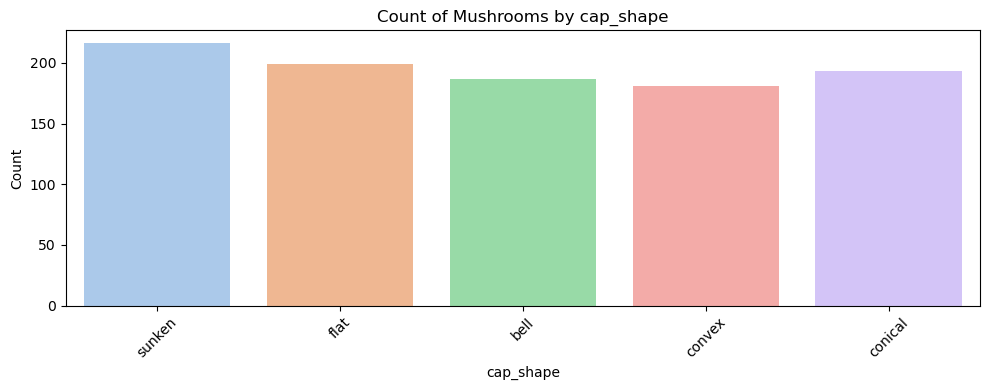

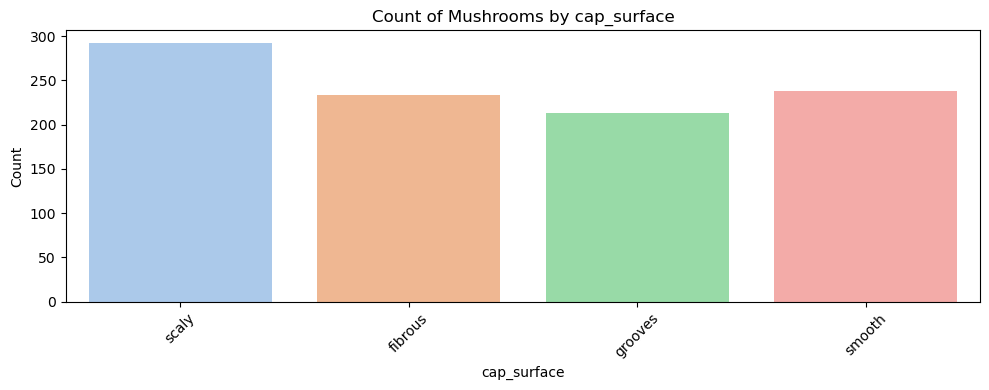

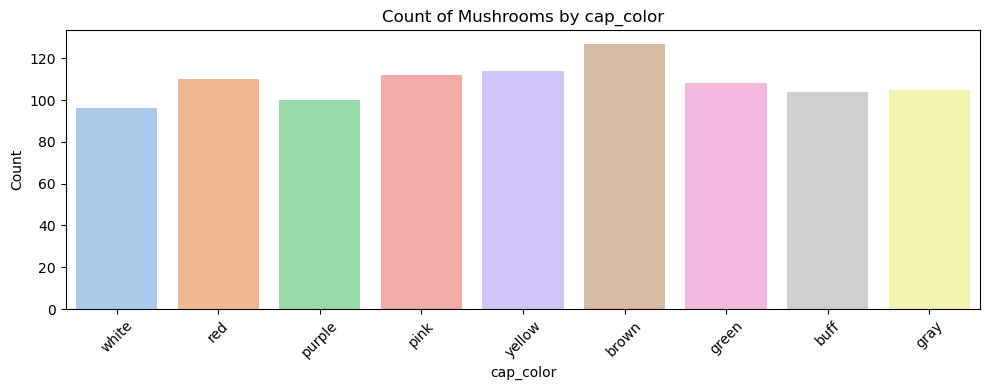

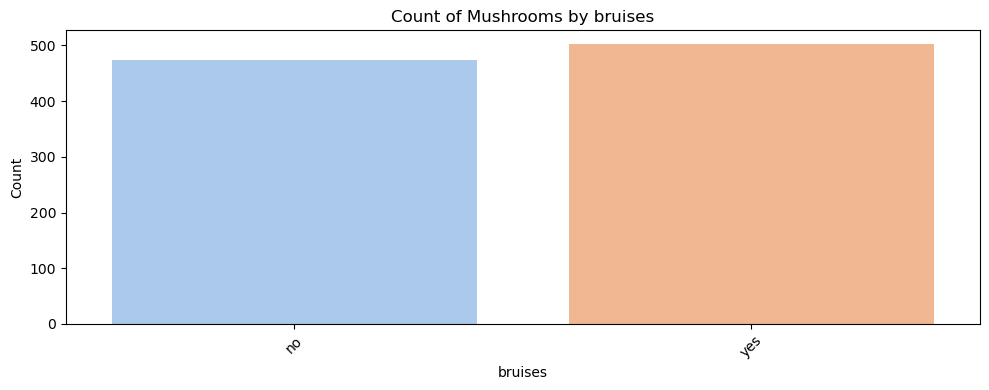

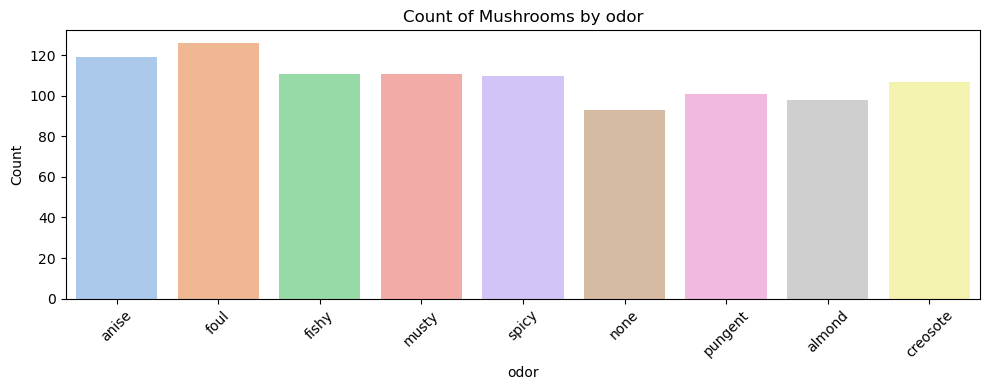

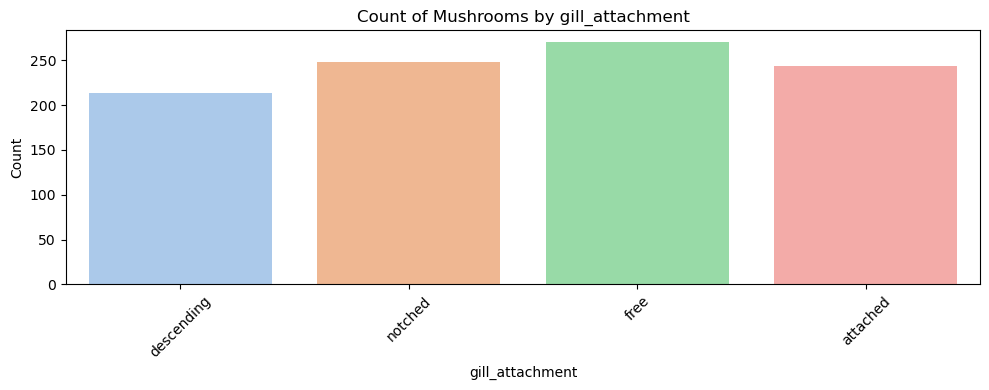

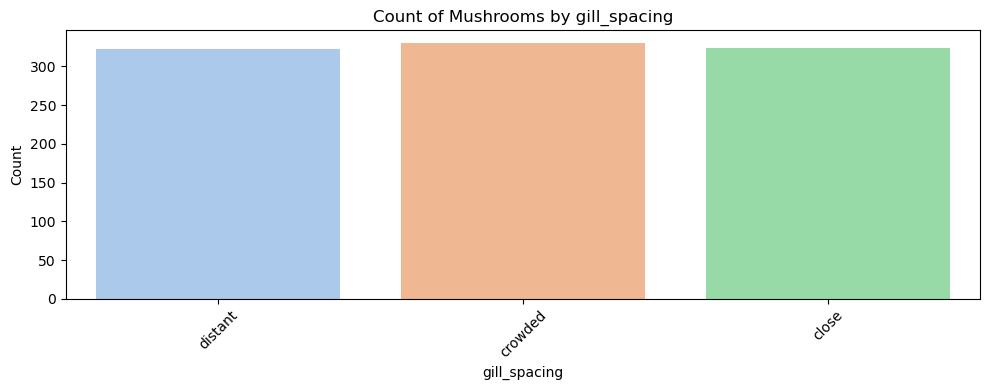

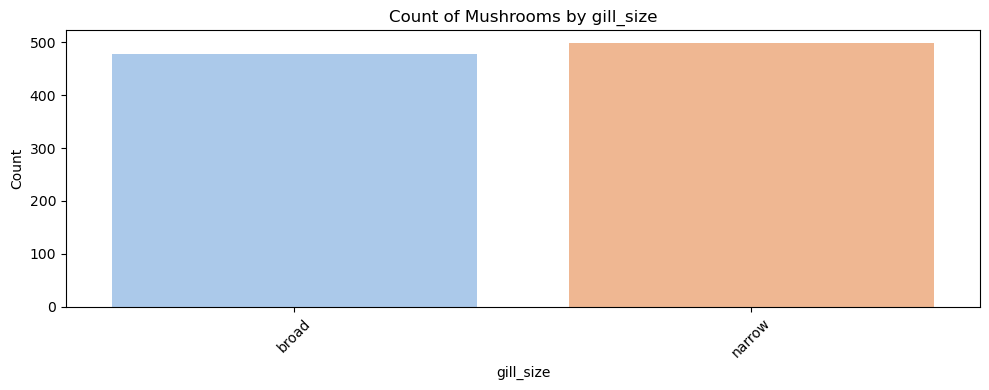

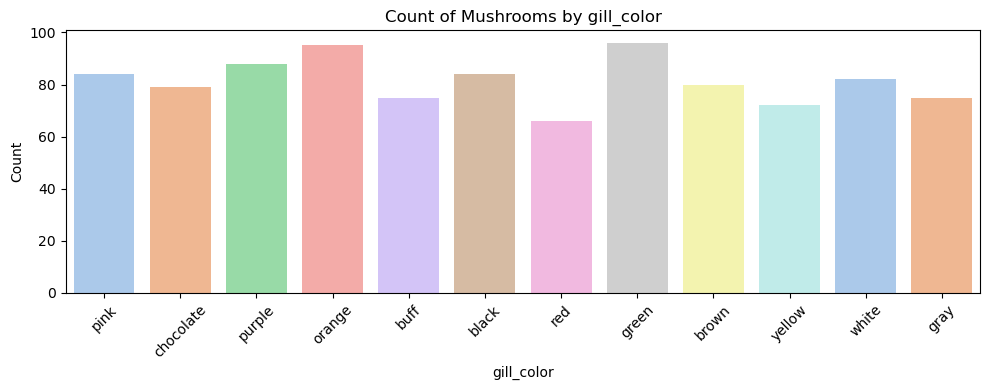

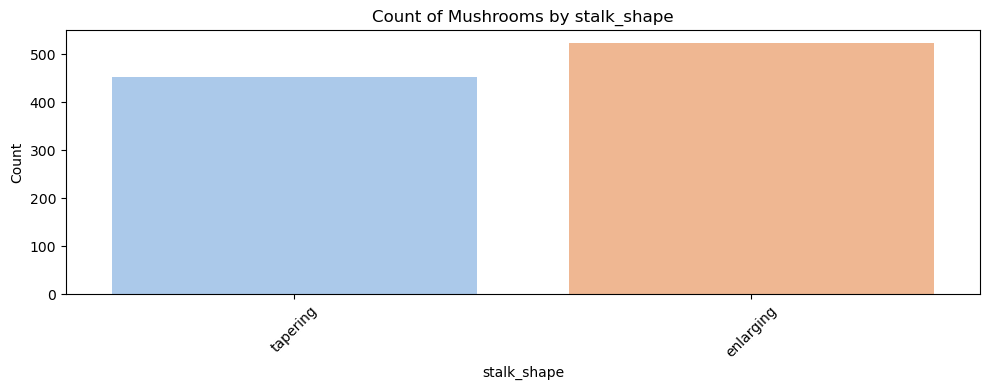

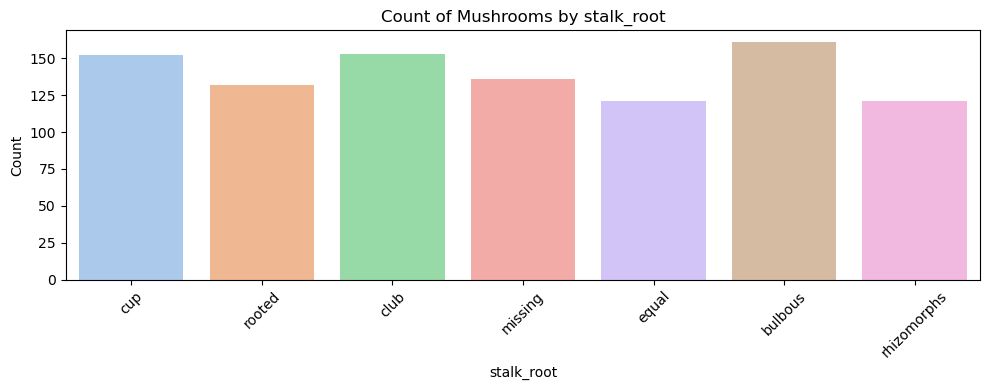

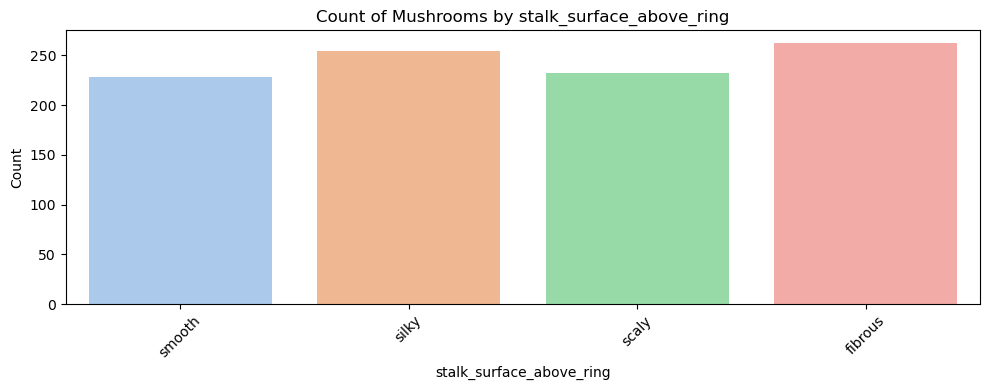

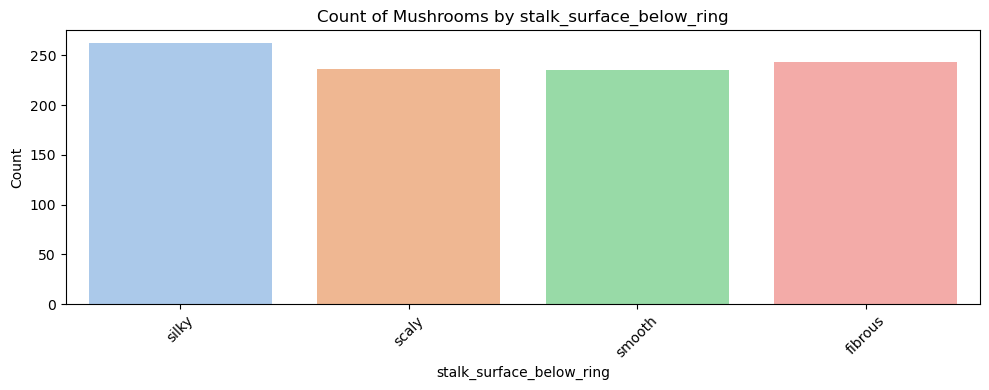

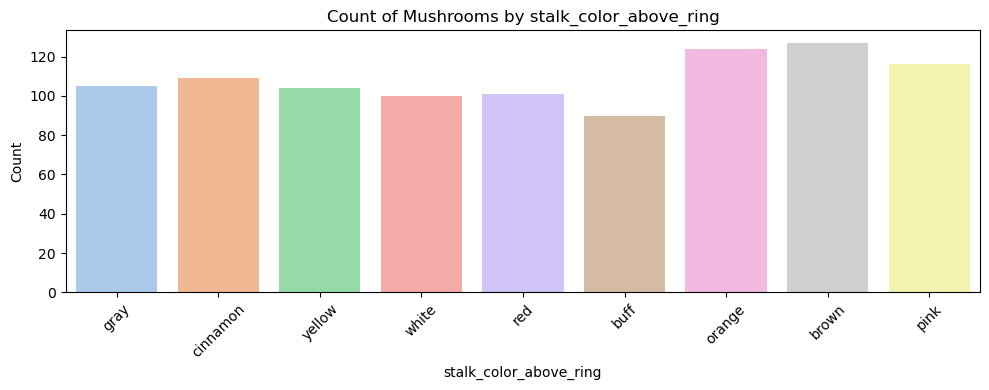

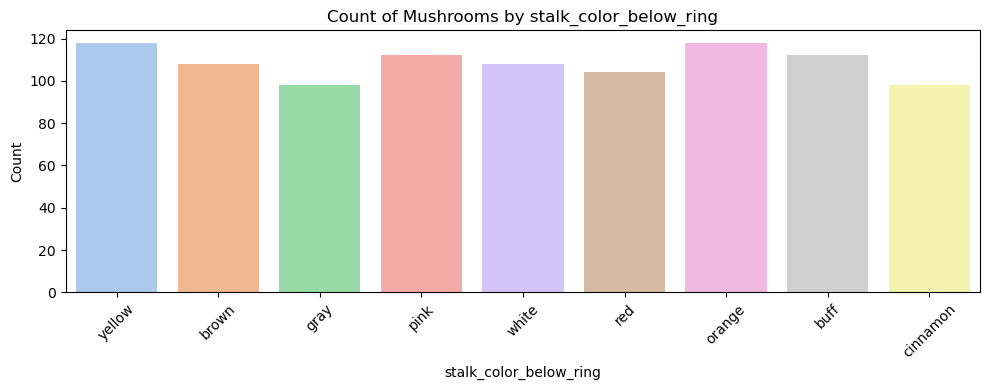

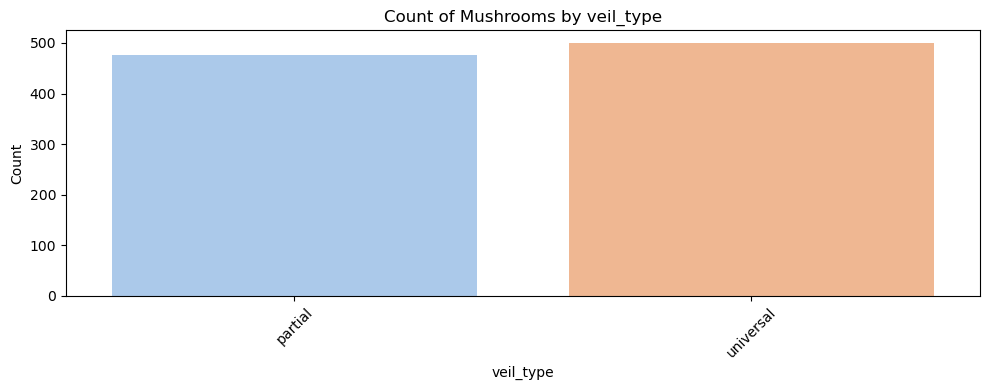

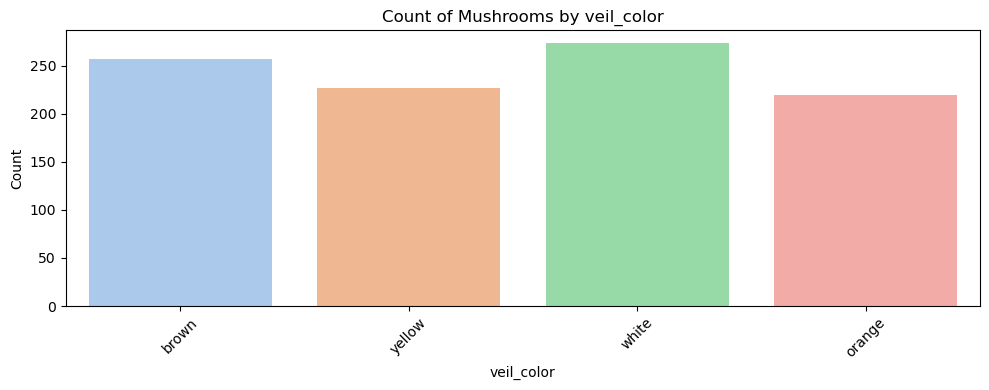

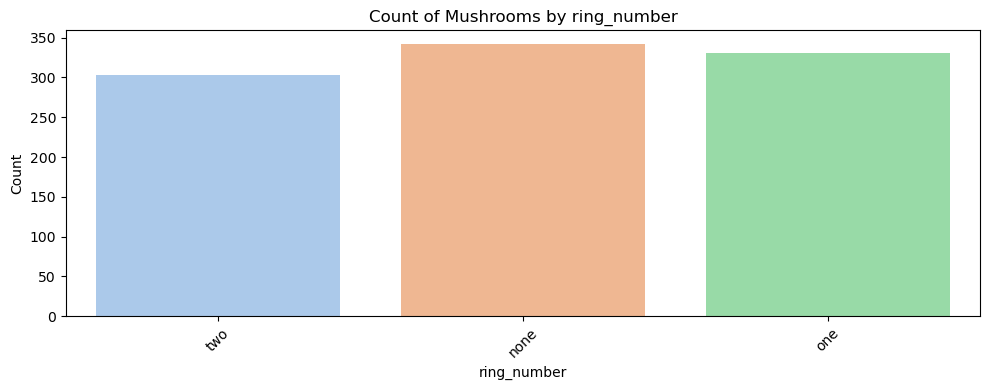

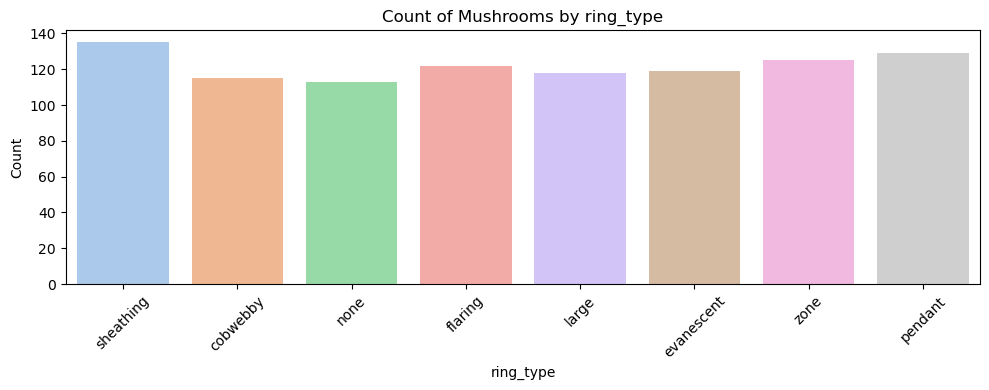

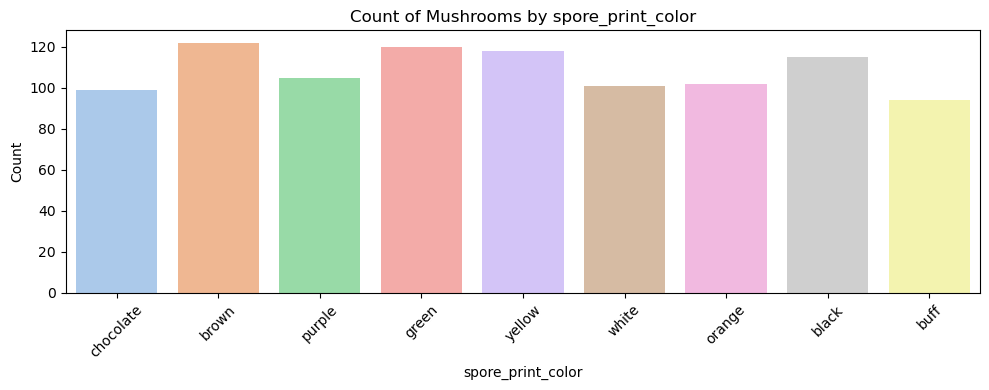

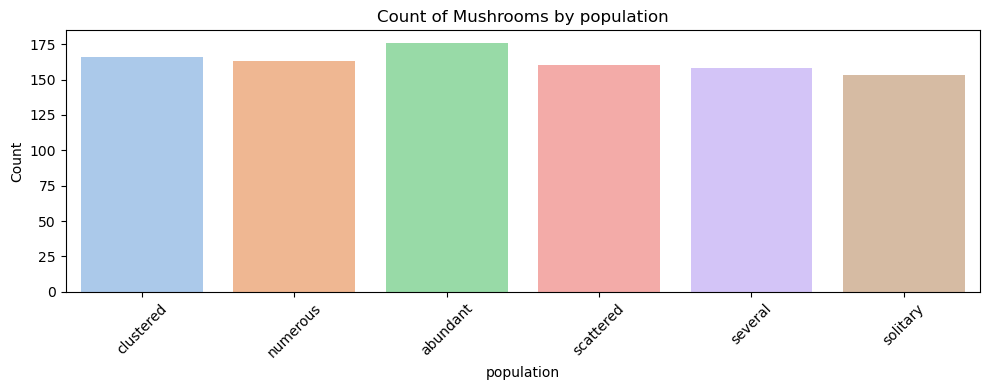

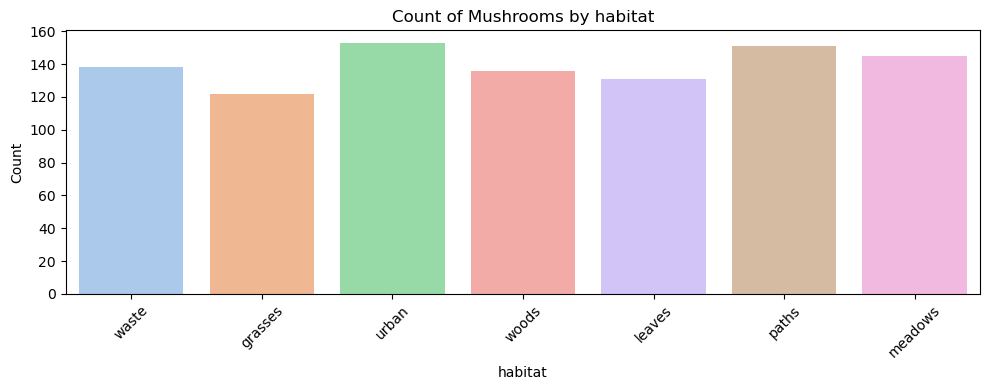

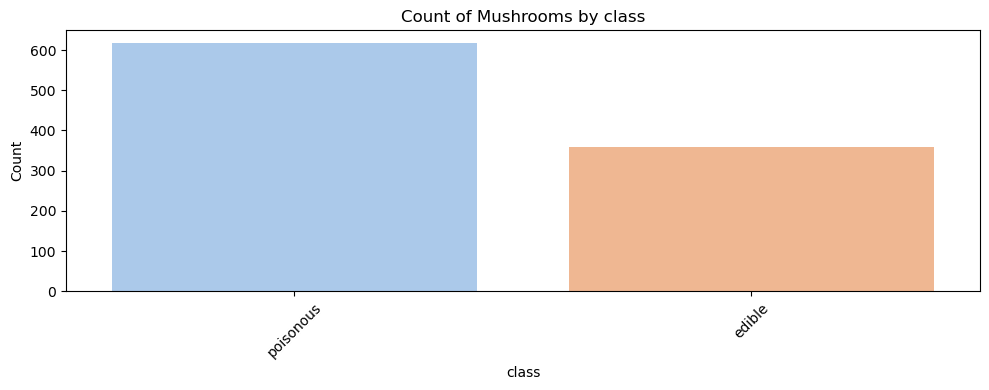

In [9]:
# Selecting only categorical columns for bar plots
categorical_columns = df.select_dtypes(include=['object']).columns

# Plotting bar plots for all categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=df, palette='pastel')
    plt.title(f'Count of Mushrooms by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Task 2: Data Preprocessing

Q1. Encode categorical variables if necessary.

Q2. Split the dataset into training and testing sets.

The data is categorical so we will use One-hot Encoder to convert it to a format that can be effectively used by machine learning algorithms. It ensures that models can effectively interpret categorical variables, avoid biases, and make accurate predictions based on categorical inputs.

The key reasons why one-hot encoding is beneficial:

1. Preserving Categorical Nature: Categorical variables represent qualitative attributes with no inherent numerical value. One-hot encoding converts each category into a binary vector representation, where each category is represented by a unique column. This transformation preserves the categorical nature of the variable.
2. Ensuring Independence: One-hot encoding ensures that the encoded variables are independent of each other. Each category is represented by its own binary indicator column (0 or 1), eliminating any implicit ordinal relationship that might be inferred if encoded differently (e.g., using label encoding).
3. Compatibility with Algorithms: Most machine learning algorithms and models require numerical input. One-hot encoding transforms categorical variables into a numerical format that algorithms can process. This is essential for algorithms such as linear regression, support vector machines (SVMs), and neural networks.
4. Handling Non-Numeric Data: Many machine learning libraries and algorithms are designed to process numeric data efficiently. By converting categorical data into numerical format through one-hot encoding, these algorithms can handle a wider range of data types without additional preprocessing steps.
5. Avoiding Bias in Model Interpretation: One-hot encoding prevents models from assigning ordinal meaning to categorical variables. If categories were encoded as integers (e.g., using label encoding), some models might incorrectly interpret the order as meaningful (e.g., 0 < 1 < 2).

In [10]:
# Perform label encoding on 'class' variable

df_encoded = df.copy()  # Create a copy of the original DataFrame
label_encoder = LabelEncoder()
# Iterate through each column in the DataFrame
for col in df_encoded.columns:
    # Check if the column is categorical (object datatype)
    if df_encoded[col].dtype == 'object':
        # Apply label encoding to each categorical column
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
df_encoded.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [11]:
# Scaling the numerical features

numerical_columns = ['stalk_height', 'cap_diameter']
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])
df_encoded.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,1.553976,-1.080201
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,-1.235285,0.926435
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,0.143086,-0.772204
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,-0.891126,1.193403
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,1.489498,-0.007635


In [12]:
# Separate features (X) and target (y)
X = df_encoded.drop('class', axis=1)  # Features
y = df_encoded['class']  # Target variable

In [13]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify
print("Training set - X shape:", X_train.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (780, 24)
Training set - y shape: (780,)
Testing set - X shape: (196, 24)
Testing set - y shape: (196,)


# Task 3: Data Visualization

Q1. Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

Q2. Visualize class distributions to gauge dataset balance or imbalance.

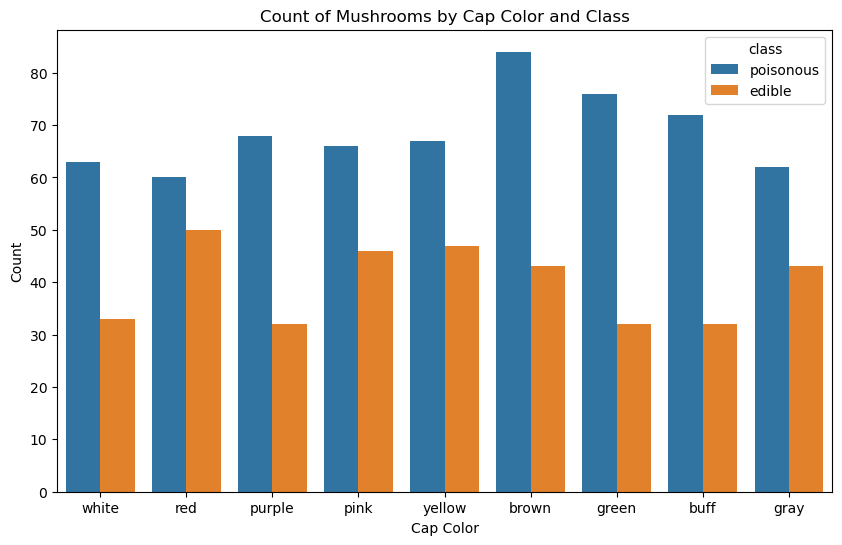

In [14]:
# Count plot for 'cap_color'
plt.figure(figsize=(10, 6))
sns.countplot(x='cap_color', data=df, hue='class')
plt.title('Count of Mushrooms by Cap Color and Class')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.show()

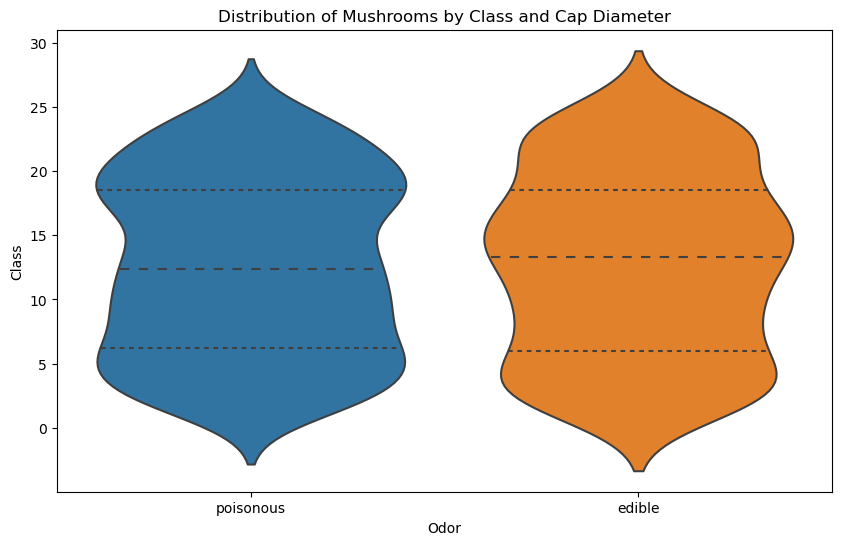

In [15]:
# Violin plot for 'odor' vs 'class'
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='cap_diameter', data=df, inner='quartile')
plt.title('Distribution of Mushrooms by Class and Cap Diameter')
plt.xlabel('Odor')
plt.ylabel('Class')
plt.show()

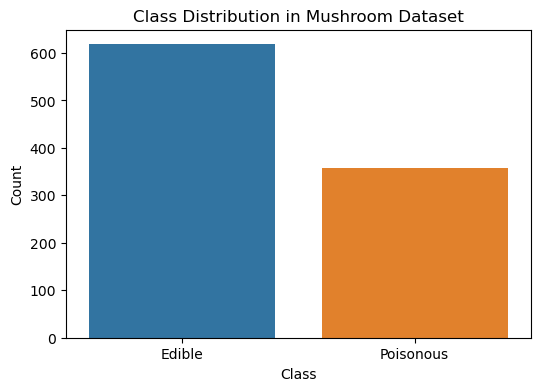

In [16]:
# Plotting the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title('Class Distribution in Mushroom Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Edible', 'Poisonous'])
plt.show()

From the above chart, we can see that there are almost double the instances for 'poisonous' class than 'edible' class. Hence, we can conclude that this dataset is imbalanced. 

# Task 4: SVM Implementation

Q1. Implement a basic SVM classifier using Python libraries like scikit-learn.

Q2. Train the SVM model on the training data.

Q3. Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [17]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [18]:
# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [19]:
# Predictions on the test set
y_pred = svm_classifier.predict(X_test)

In [20]:
# Evaluate model performance

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.6327
Precision: 0.4002
Recall: 0.6327
F1-score: 0.4903


# Task 5: Visualization of SVM Results

Q1. Visualize classification results on the testing data.

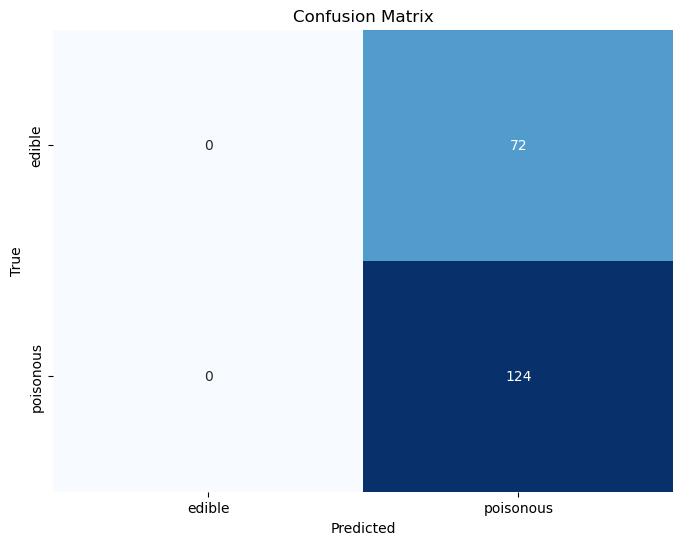

In [21]:
# Confusion Matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Task 6: Parameter Tuning and Optimization

Q1. Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [22]:
# Define a Parameter Grid

param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'gamma': ['scale', 'auto'],   # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']   # Kernel type
}

In [23]:
# Perform Grid Search Cross-Validation

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

In [24]:
# Best Model Evaluation

# Evaluate on test set
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set: {:.2f}".format(test_accuracy))

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

Accuracy on Test Set: 0.63


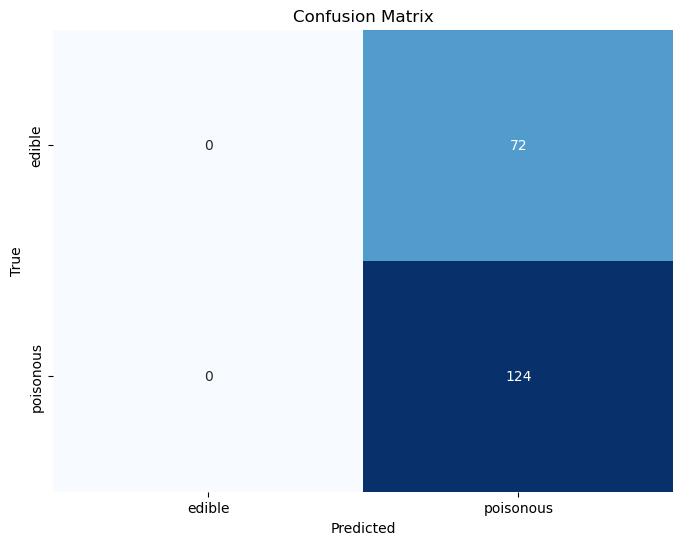

In [25]:
# Confusion Matrix for the best model

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Task 7: Comparison and Analysis

Q1. Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

Q2. Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

Q3. Discuss practical implications of SVM in real-world classification tasks.

In [26]:
# Results for all the parameter combinations during Grid Search

results = pd.DataFrame(grid_search.cv_results_)

for index, row in results.iterrows():
    print(f"Parameters: {row['params']}")
    print(f"Mean Cross-validation Accuracy: {row['mean_test_score']:.4f}")
    print("")

Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mean Cross-validation Accuracy: 0.6333

Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Cross-validation Accuracy: 0.6333

Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Mean Cross-validation Accuracy: 0.6333

Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Mean Cross-validation Accuracy: 0.6333

Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}
Mean Cross-validation Accuracy: 0.6333

Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Cross-validation Accuracy: 0.6333

Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Mean Cross-validation Accuracy: 0.5269

Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}
Mean Cross-validation Accuracy: 0.6333

Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Mean Cross-validation Accuracy: 0.6333

Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Cross-validation Accuracy: 0.6321

Parameter

#### Interpretation

1. Mean Cross-validation Accuracy: This metric represents the average accuracy of the model across different folds of the cross-validation process for each set of hyperparameters.
2. Observations:
    1. The accuracy remains consistently around 63.33% for various combinations of parameters when using linear and radial basis function (RBF) kernels with different regularization strengths (C) and gamma values.
    2. Polynomial and sigmoid kernels generally result in lower accuracies compared to linear and RBF kernels across different values of C and gamma.
    3. Higher values of C (e.g., 10, 100) generally do not significantly improve accuracy and may even decrease it slightly, especially for RBF and polynomial kernels.
    4. Using 'auto' for gamma doesn't consistently lead to better accuracies compared to 'scale'.

##### Conclusion:

1. Based on these results, SVM models with linear and RBF kernels tend to perform better on this dataset compared to polynomial and sigmoid kernels.
2. The choice of C and gamma parameters affects the model's performance, with a C value of 0.1 or 1 often providing similar cross-validation accuracies.

#### Strengths of SVM

1. Effective in High-Dimensional Spaces: SVMs perform well in high-dimensional spaces, making them suitable for datasets with many features, such as the Mushroom dataset which has various categorical attributes encoded.
2. Robust to Overfitting: SVMs can generalize well and are less prone to overfitting, especially when the regularization parameter C is properly tuned. This is advantageous for datasets with a moderate amount of data like the Mushroom dataset.
3. Versatility in Kernels: SVMs can utilize different kernel functions (e.g., linear, polynomial, RBF) to handle complex relationships between features. This flexibility allows SVMs to capture non-linear decision boundaries effectively.
4. Good Performance with Clear Margins: SVMs aim to maximize the margin between classes, which promotes better generalization and can lead to improved performance on unseen data, provided the classes are well-separated.
5. Handles Imbalanced Data Well: SVMs can perform well even when the classes are imbalanced, as they primarily depend on support vectors (the most informative data points) rather than the entire dataset.

#### Weaknesses of SVM:

1. Computationally Intensive: SVMs can be slow to train, especially with large datasets, because they require solving a quadratic programming problem. This complexity can make SVM training time-consuming.
2. Sensitive to Noise: SVMs can be sensitive to noise in the data, which can affect the placement of the decision boundary and potentially reduce performance if the noise is not managed properly during preprocessing.
3. Difficulty in Interpreting Kernel Parameters: Choosing the right kernel function and tuning its parameters (e.g., gamma for RBF kernel, degree for polynomial kernel) can be challenging. Improper tuning can lead to suboptimal results.
4. Memory Intensive for Large Datasets: SVMs require significant memory for storing support vectors and the decision function, especially with large datasets. This can limit their applicability in big data scenarios without appropriate computational resources.
5. Limited Direct Probability Estimates: Unlike some other classifiers (e.g., logistic regression), SVMs do not naturally provide probability estimates directly. Instead, these estimates need to be derived using additional methods like Platt scaling or cross-validation.

#### Practical implications of SVMs

1. Effective in High-Dimensional Spaces: SVMs perform well in high-dimensional spaces, making them suitable for tasks where the number of features (dimensions) is large compared to the number of samples. This property is beneficial in applications such as:
    1. Text classification: SVMs can efficiently classify documents represented by high-dimensional feature vectors (e.g., TF-IDF, word embeddings).
    2. Image classification: SVMs can handle feature vectors extracted from images with numerous pixel values or extracted features.
2. Versatility in Kernel Methods: SVMs can utilize different kernel functions to handle various types of data distributions:
    1. Linear Kernel: Suitable for linearly separable data or when interpretability is important.
    2. Polynomial Kernel: Useful for data with non-linear boundaries where polynomial features are considered.
    3. RBF Kernel: Effective for complex, non-linear decision boundaries where data points are not easily separable.
3. Robustness to Overfitting: SVMs have a regularization parameter (C) that helps control the trade-off between maximizing the margin and minimizing the classification error. This parameter allows SVMs to generalize well and avoid overfitting, particularly when the number of features is large.
4. Memory Efficiency: Once SVMs are trained, only a subset of the training points (support vectors) is needed to make predictions. This makes SVMs memory-efficient, especially when dealing with large datasets.
5. Handling Non-linear Decision Boundaries: With appropriate kernel selection (e.g., polynomial, RBF), SVMs can model complex decision boundaries effectively. This capability is valuable in tasks where the relationship between input features and target labels is non-linear.
6. Binary and Multi-class Classification: SVMs inherently perform binary classification. However, techniques such as one-vs-rest or one-vs-one can extend SVMs to handle multi-class classification tasks. SVMs are widely used in scenarios where:
    1. Binary classification: Distinguishing between two classes (e.g., spam vs. non-spam emails).
    2. Multi-class classification: Classifying instances into multiple classes (e.g., different types of diseases).
7. Interpretability and Decision Boundaries: The decision function of SVMs is based on support vectors, which are the data points closest to the decision boundary. This property allows SVMs to provide insights into which features are most influential in making classification decisions, enhancing interpretability.
8. Real-world Applications: SVMs find applications across various domains and industries:
    1. Healthcare: Disease diagnosis based on medical records or images.
    2. Finance: Credit scoring, fraud detection based on transactional data.
    3. Bioinformatics: Protein classification, gene expression analysis.
    4. Text and Image Processing: Document classification, image recognition.

#### Challenges and Considerations

1. Scalability: SVMs can be computationally intensive, especially with large datasets.
2. Parameter Selection: Proper selection of kernel type, regularization parameter (C), and kernel parameters (gamma for RBF, degree for polynomial) is crucial for optimal performance.
3. Interpretability: While SVMs provide insights into decision boundaries, complex kernels and high-dimensional spaces can make interpretation challenging.